In [1]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import bds
import pandas_datareader as data
import statsmodels.tsa.stattools as stat

In [2]:
#ibm=data.DataReader("IBM",
#                        start='2015-9-1',
#                        end='2021-6-28',
 #                       data_source='yahoo')
ibm = pd.read_csv("C:\\Users\\Jasper\\Downloads\\IBM.csv")    
ibm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-01,144.910004,144.979996,141.850006,142.679993,110.966637,5272000
1,2015-09-02,144.740005,145.080002,143.179993,145.050003,112.809868,4252000
2,2015-09-03,146.050003,148.029999,145.770004,146.779999,114.155334,3603500
3,2015-09-04,144.570007,145.399994,143.320007,143.699997,111.759918,4201100
4,2015-09-08,145.860001,147.339996,145.660004,147.229996,114.505325,3933300
...,...,...,...,...,...,...,...
1461,2021-06-22,146.520004,146.809998,145.350006,146.360001,146.360001,2437000
1462,2021-06-23,146.429993,146.500000,144.570007,144.610001,144.610001,3202600
1463,2021-06-24,145.800003,146.190002,144.690002,145.440002,145.440002,3609700
1464,2021-06-25,145.380005,146.929993,144.949997,146.839996,146.839996,3593500


In [1]:
ibm['Log Return'] = 100*np.log(ibm['Adj Close']/ibm['Adj Close'].shift(1))
ibm = ibm.drop([0], axis = 0)
ibm

NameError: name 'np' is not defined

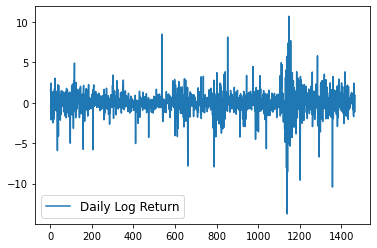

In [4]:
plt.plot(ibm['Log Return'],label='Daily Log Return')
plt.legend(loc='best', fontsize='large')
plt.show()

In [5]:
#Part a)
#No Trend
X = ibm['Log Return'].values
result = adfuller(X, maxlag=None, regression='c', autolag='BIC', store=False, regresults=False)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('\t%s:%.3f'%(key,value))
if result[0] < result [4] ["5%"]:
	print("Reject Ho_ . Time Series is then stationary")
else: 
	print("Failed to Reject Ho_ . Time Series is then non-stationary")

ADF Statistic: -41.57062350867211
n_lags: 0.0
p-value: 0.0
	1%:-3.435
	5%:-2.864
	10%:-2.568
Reject Ho_ . Time Series is then stationary


In [6]:
# With trend
result = adfuller(X, maxlag=None, regression='ct', autolag='BIC', store=False, regresults=False)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('\t%s:%.3f'%(key,value))
if result[0] < result [4] ["5%"]:
	print("Reject Ho_ . Time Series is then stationary")
else: 
	print("Failed to Reject Ho_ . Time Series is then non-stationary")
    

ADF Statistic: -41.55781323985408
n_lags: 0.0
p-value: 0.0
	1%:-3.965
	5%:-3.413
	10%:-3.129
Reject Ho_ . Time Series is then stationary


In [7]:
#Part c)
# Fitting ARIMA(1,1)
arima=ARIMA(ibm['Log Return'].values,exog=None, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=True)
results = arima.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1465
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2776.383
Date:                Sat, 10 Jul 2021   AIC                           5560.766
Time:                        23:58:46   BIC                           5581.924
Sample:                             0   HQIC                          5568.657
                               - 1465   Scale                            2.592
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.040      0.458      0.647      -0.060       0.097
ar.L1         -0.3561      0.141     -2.521      0.012      -0.633      -0.079
ma.L1          0.2717      0.152      1.793      0.0

In [8]:
#Part C) bds test
import statistics
var= statistics.variance(results.resid)
se= var**0.5
std_res=results.resid/se

In [9]:
bds = stat.bds(std_res,max_dim=2, epsilon=None, distance = 1.5)
print('bds_stat, pvalue:{}'.format(bds))
#Fail to reject = iid

bds_stat, pvalue:(array(0.35854979), array(0.71993191))


In [10]:
#Part d)
#IRF Function
irf= results.impulse_responses(30) 
irf 

array([ 1.00000000e+00, -8.43906938e-02,  3.00505345e-02, -1.07006422e-02,
        3.81037296e-03, -1.35682904e-03,  4.83150877e-04, -1.72044350e-04,
        6.12629714e-05, -2.18150243e-05,  7.76807380e-06, -2.76611980e-06,
        9.84982759e-07, -3.50740787e-07,  1.24894673e-07, -4.44735254e-08,
        1.58364998e-08, -5.63919150e-09,  2.00804983e-09, -7.15042949e-10,
        2.54618392e-10, -9.06666176e-11,  3.22853172e-11, -1.14964221e-11,
        4.09374081e-12, -1.45773300e-12,  5.19081593e-13, -1.84838856e-13,
        6.58189446e-14, -2.34373528e-14,  8.34576593e-15])

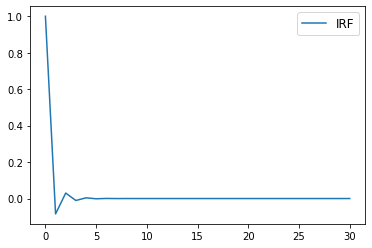

In [11]:
y = np.array(irf) 

plt.plot(y,label='IRF') 
plt.legend(loc='best', fontsize='large')
plt.show()